In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sns.set_style(style='darkgrid')

# 1. Load the dataset

In [3]:
df = pd.read_csv('Data - Parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2. Study the data and mention a few comments in this regard

In [4]:
print(df.shape)
df.info()

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non

In [5]:
# Checking null value sum
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

- The dataset is of shape (195,24)
- No sign of missing values
- All the columns are read as numeric columns (either float or int)
- Continuous columns : 'MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'
- Categorical columns : 'status'

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


- As we can see from above description, the columns have varying units of measures among themselves. Thus, scaling the dataset will help increase the accuracy of the models.
- As we can see, most of the attributes except some, are skewed towards the right, therefore techniques like OverSampling/UnderSampling will help achieve a more balanced dataset with respect to all columns

In [7]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

According to the status given in the dataset, 147 of them have parkinsons disease while 48 are found to be healthy

In [8]:
df.drop(columns='name', inplace = True) 

Column 'name' acting like an identifier does not have any impact on the target column 'status'. Thus, it's better to remove such columns

# 3. Univariate & Bivariate analysis

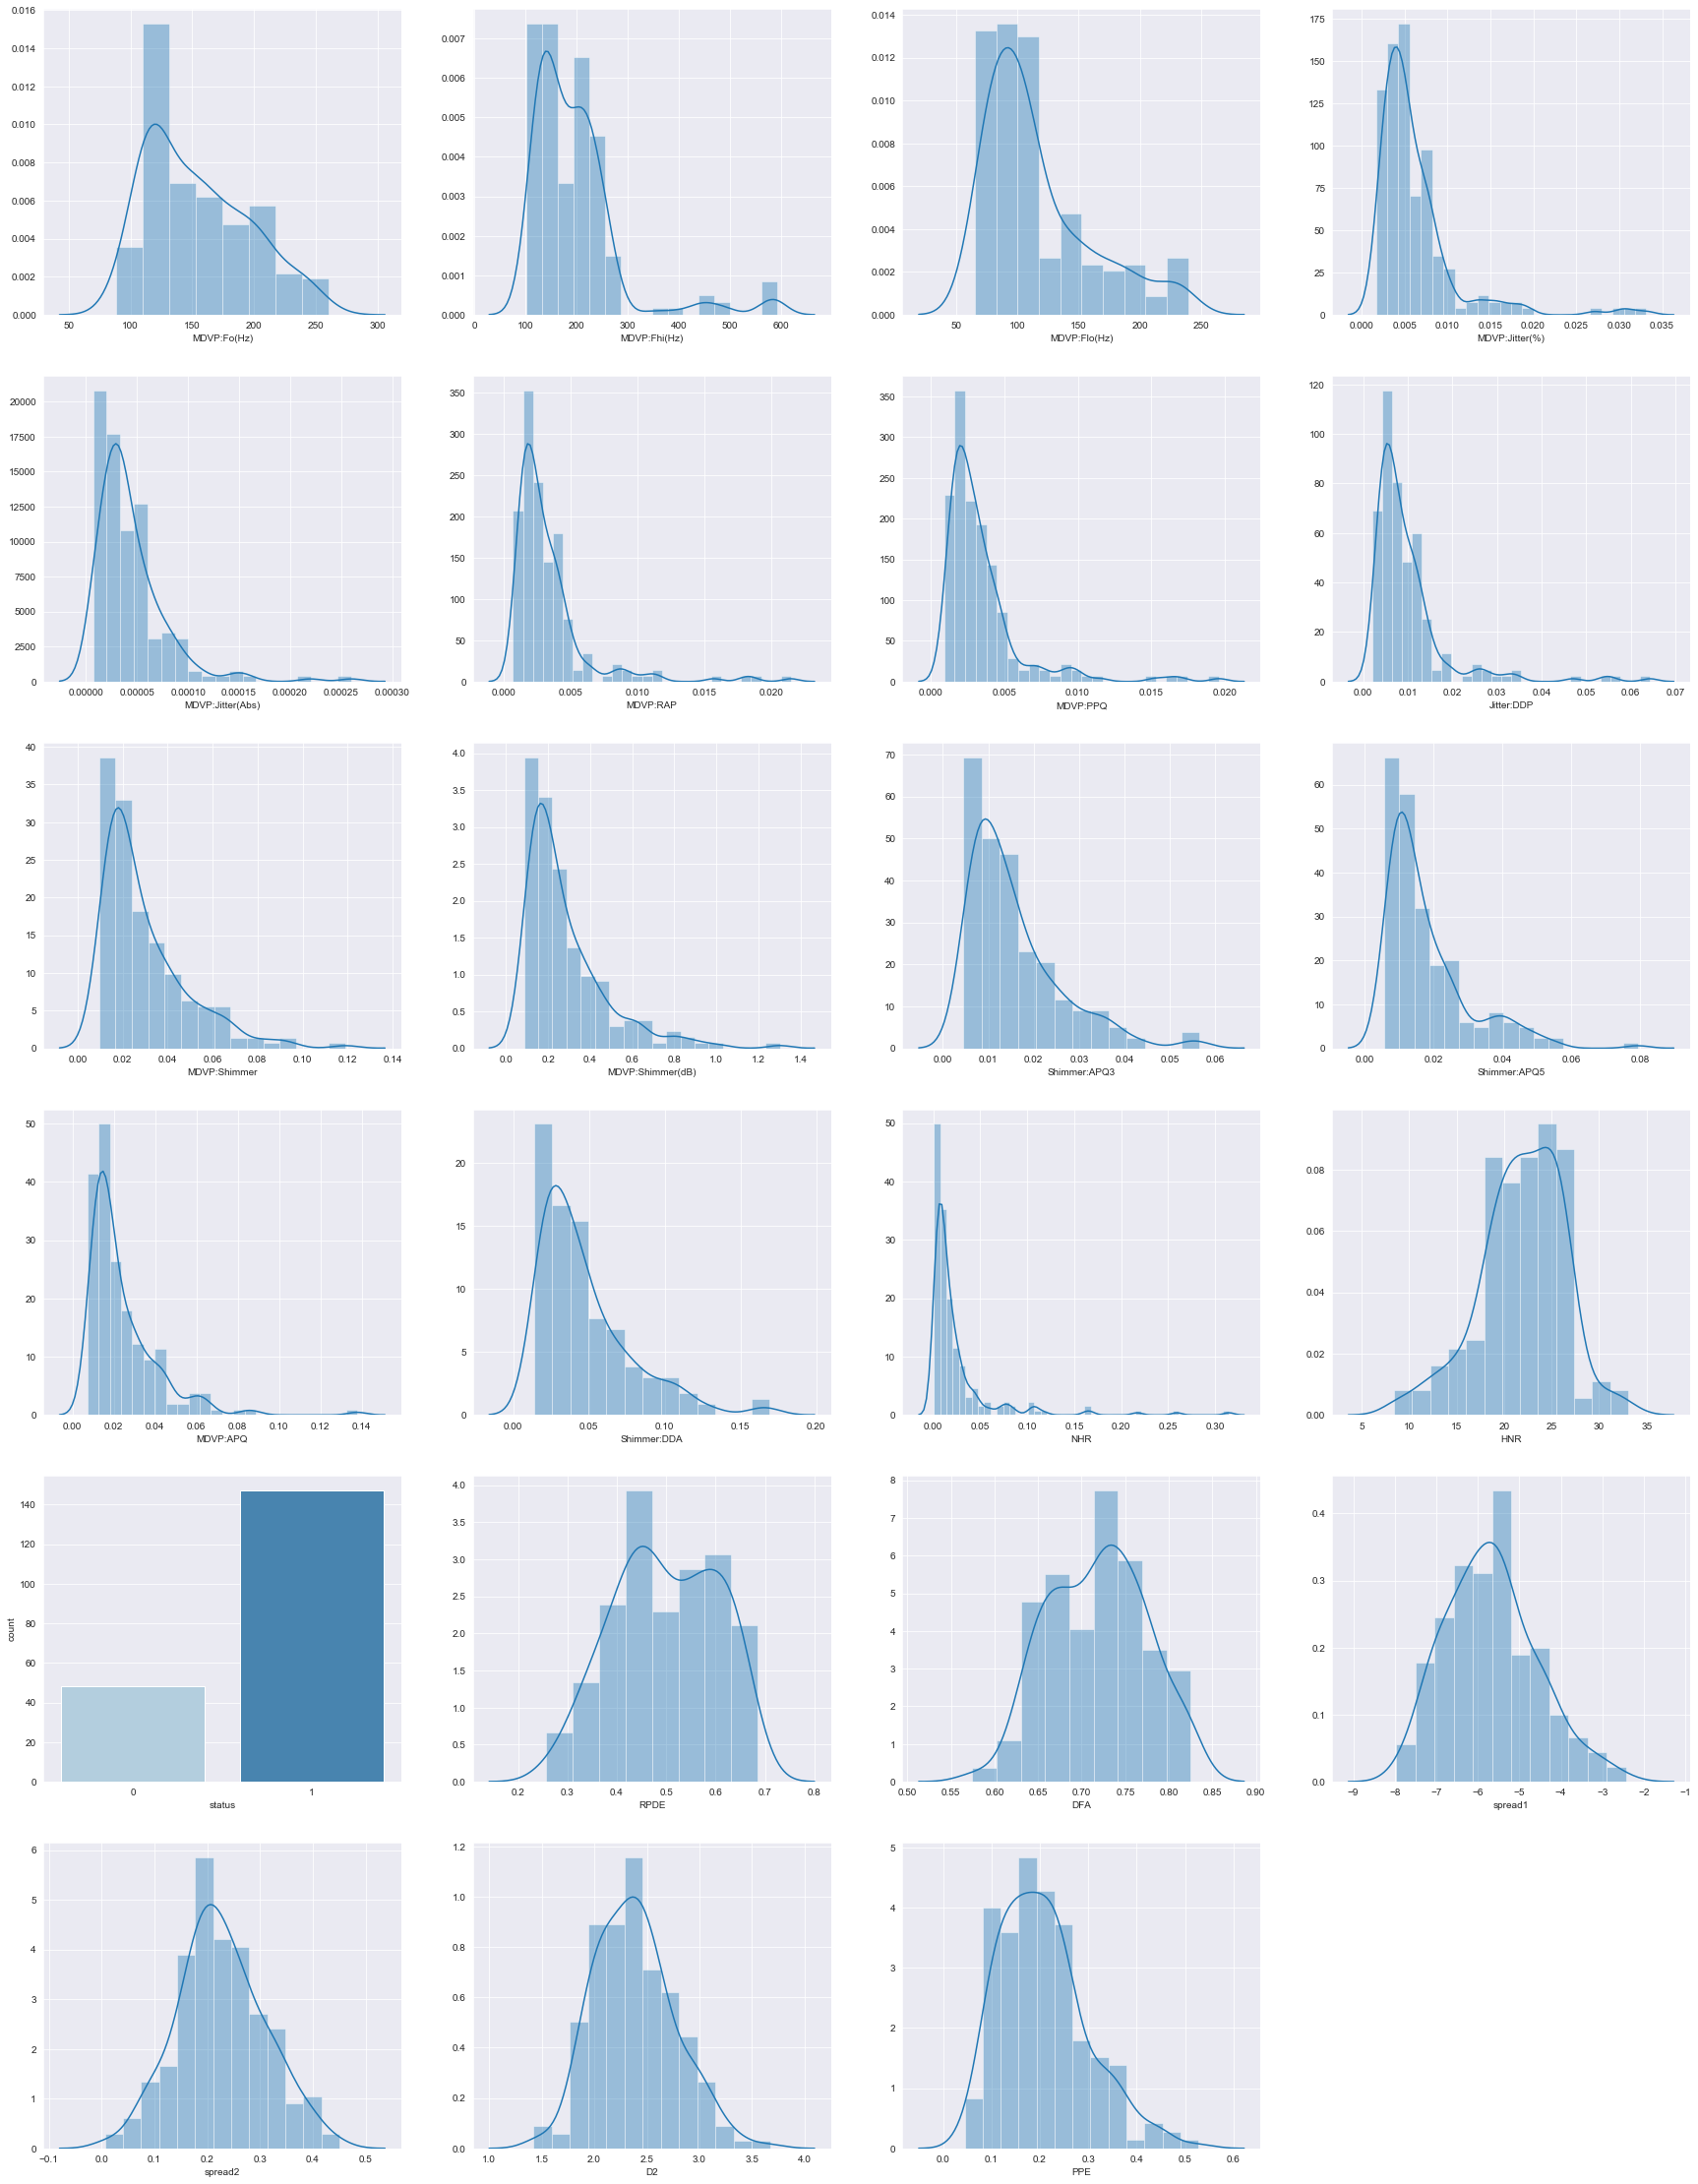

In [633]:
plt.figure(figsize= (30,40))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(6, 4, pos)   # plot grid
    if feature in ['status']:   
        sns.countplot(df[feature], palette= 'Blues') # Plot histogram for all the continuous columns           
    else:
        sns.distplot(df[feature], kde= True )
           # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  

In [639]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df['MDVP:Fo(Hz)']),stats.skew(df['MDVP:Fhi(Hz)']),stats.skew(df['MDVP:Flo(Hz)']),stats.skew(df['MDVP:Jitter(%)']),stats.skew(df['MDVP:Jitter(Abs)']),stats.skew(df['MDVP:RAP']),stats.skew(df['MDVP:PPQ']),stats.skew(df['Jitter:DDP']),stats.skew(df['MDVP:Shimmer']),stats.skew(df['MDVP:Shimmer(dB)']),stats.skew(df['Shimmer:APQ3']),stats.skew(df['Shimmer:APQ5']),stats.skew(df['MDVP:APQ']),stats.skew(df['Shimmer:DDA']),stats.skew(df['NHR']),stats.skew(df['HNR']),stats.skew(df['RPDE']),stats.skew(df['DFA']),stats.skew(df['spread1']),stats.skew(df['spread2']),stats.skew(df['D2']),stats.skew(df['PPE'])]},
                       index = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'])
# Measure the skeweness of the required columns
Skewness

,Skewness
MDVP:Fo(Hz),0.587176
MDVP:Fhi(Hz),2.522549
MDVP:Flo(Hz),1.207966
MDVP:Jitter(%),3.061165
MDVP:Jitter(Abs),2.628650
MDVP:RAP,3.334801
MDVP:PPQ,3.050196
Jitter:DDP,3.336141
MDVP:Shimmer,1.653634
MDVP:Shimmer(dB),1.983976


After plotting the univariate plot for every continuous and categorical variable we try finding out the skewness of each attribute.
- The most highly skewed is "NHR" with skewness values as 4.188173
- Following it in queue are Jitter:DDP, MDVP:RAP, MDVP:Jitter(%), MDVP:PPQ, MDVP:Jitter(Abs), MDVP:Fhi(Hz), MDVP:APQ, MDVP:Shimmer(dB), Shimmer:APQ5, Shimmer:APQ3, MDVP:Flo(Hz) in given descending order
- Rest all the attributes with skewness -1 to 1 are almost normally distributed with bit of skewness involved

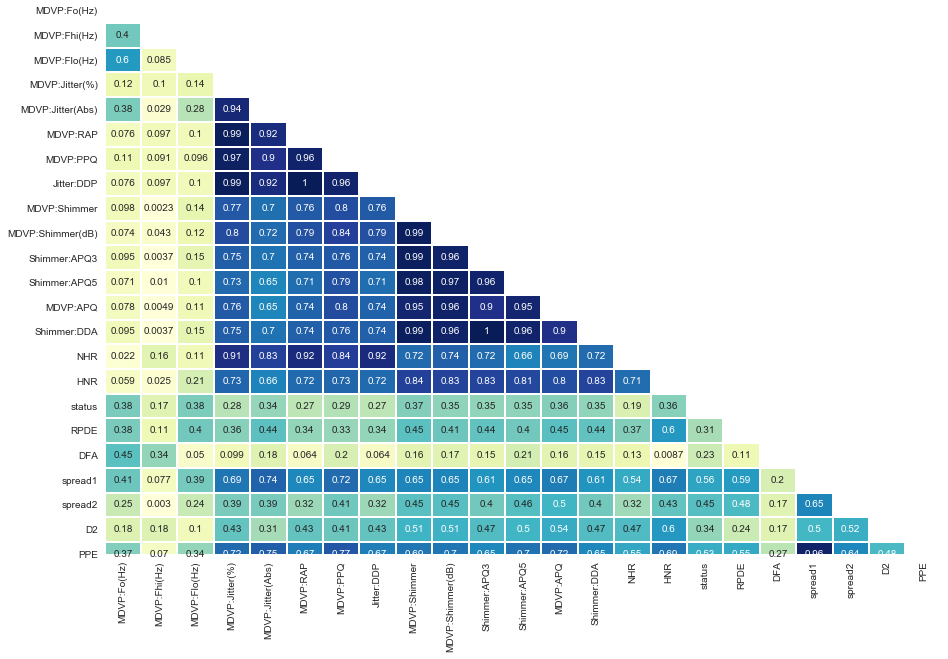

In [640]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'YlGnBu', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
#plt.xticks(rotation = 50)   # Aesthetic purposes
#plt.yticks(rotation = 10)   # Aesthetic purposes
plt.show()

From the above correlation heatmap we find the below
- None of the attributes are highly correlated with the target column.
- Some of the attributes have really good relationship between them, for e.g. - Shimmer:DDA & Shimmer:APQ3, Jitter:DDP & MDVP:RAP and so on.

In [641]:
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=True)

MDVP:Fhi(Hz)        0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
HNR                 0.361515
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
MDVP:Flo(Hz)        0.380200
MDVP:Fo(Hz)         0.383535
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

As we see from the above dataframe, independent variables as mentioned below are really low. Thus removing them might enhance the performance of the models.
- MDVP:Fhi(Hz)
- NHR
- DFA
- Jitter:DDP
- MDVP:RAP 

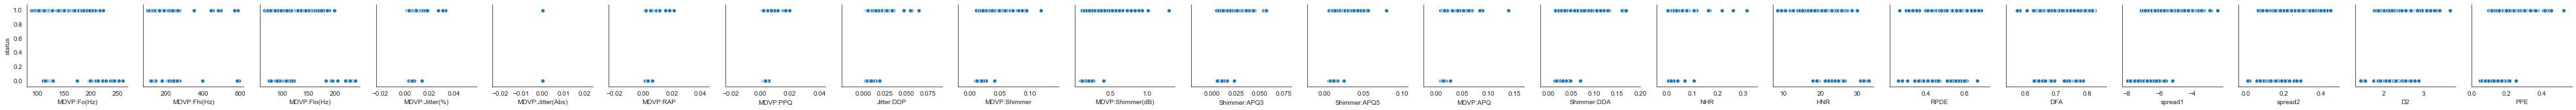

In [642]:
sns.pairplot(df, x_vars=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'], y_vars=['status'], diag_kind='kde')    # pairplot
plt.show()

Shows the pairplot between all the independent variables with the target column "Status"

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


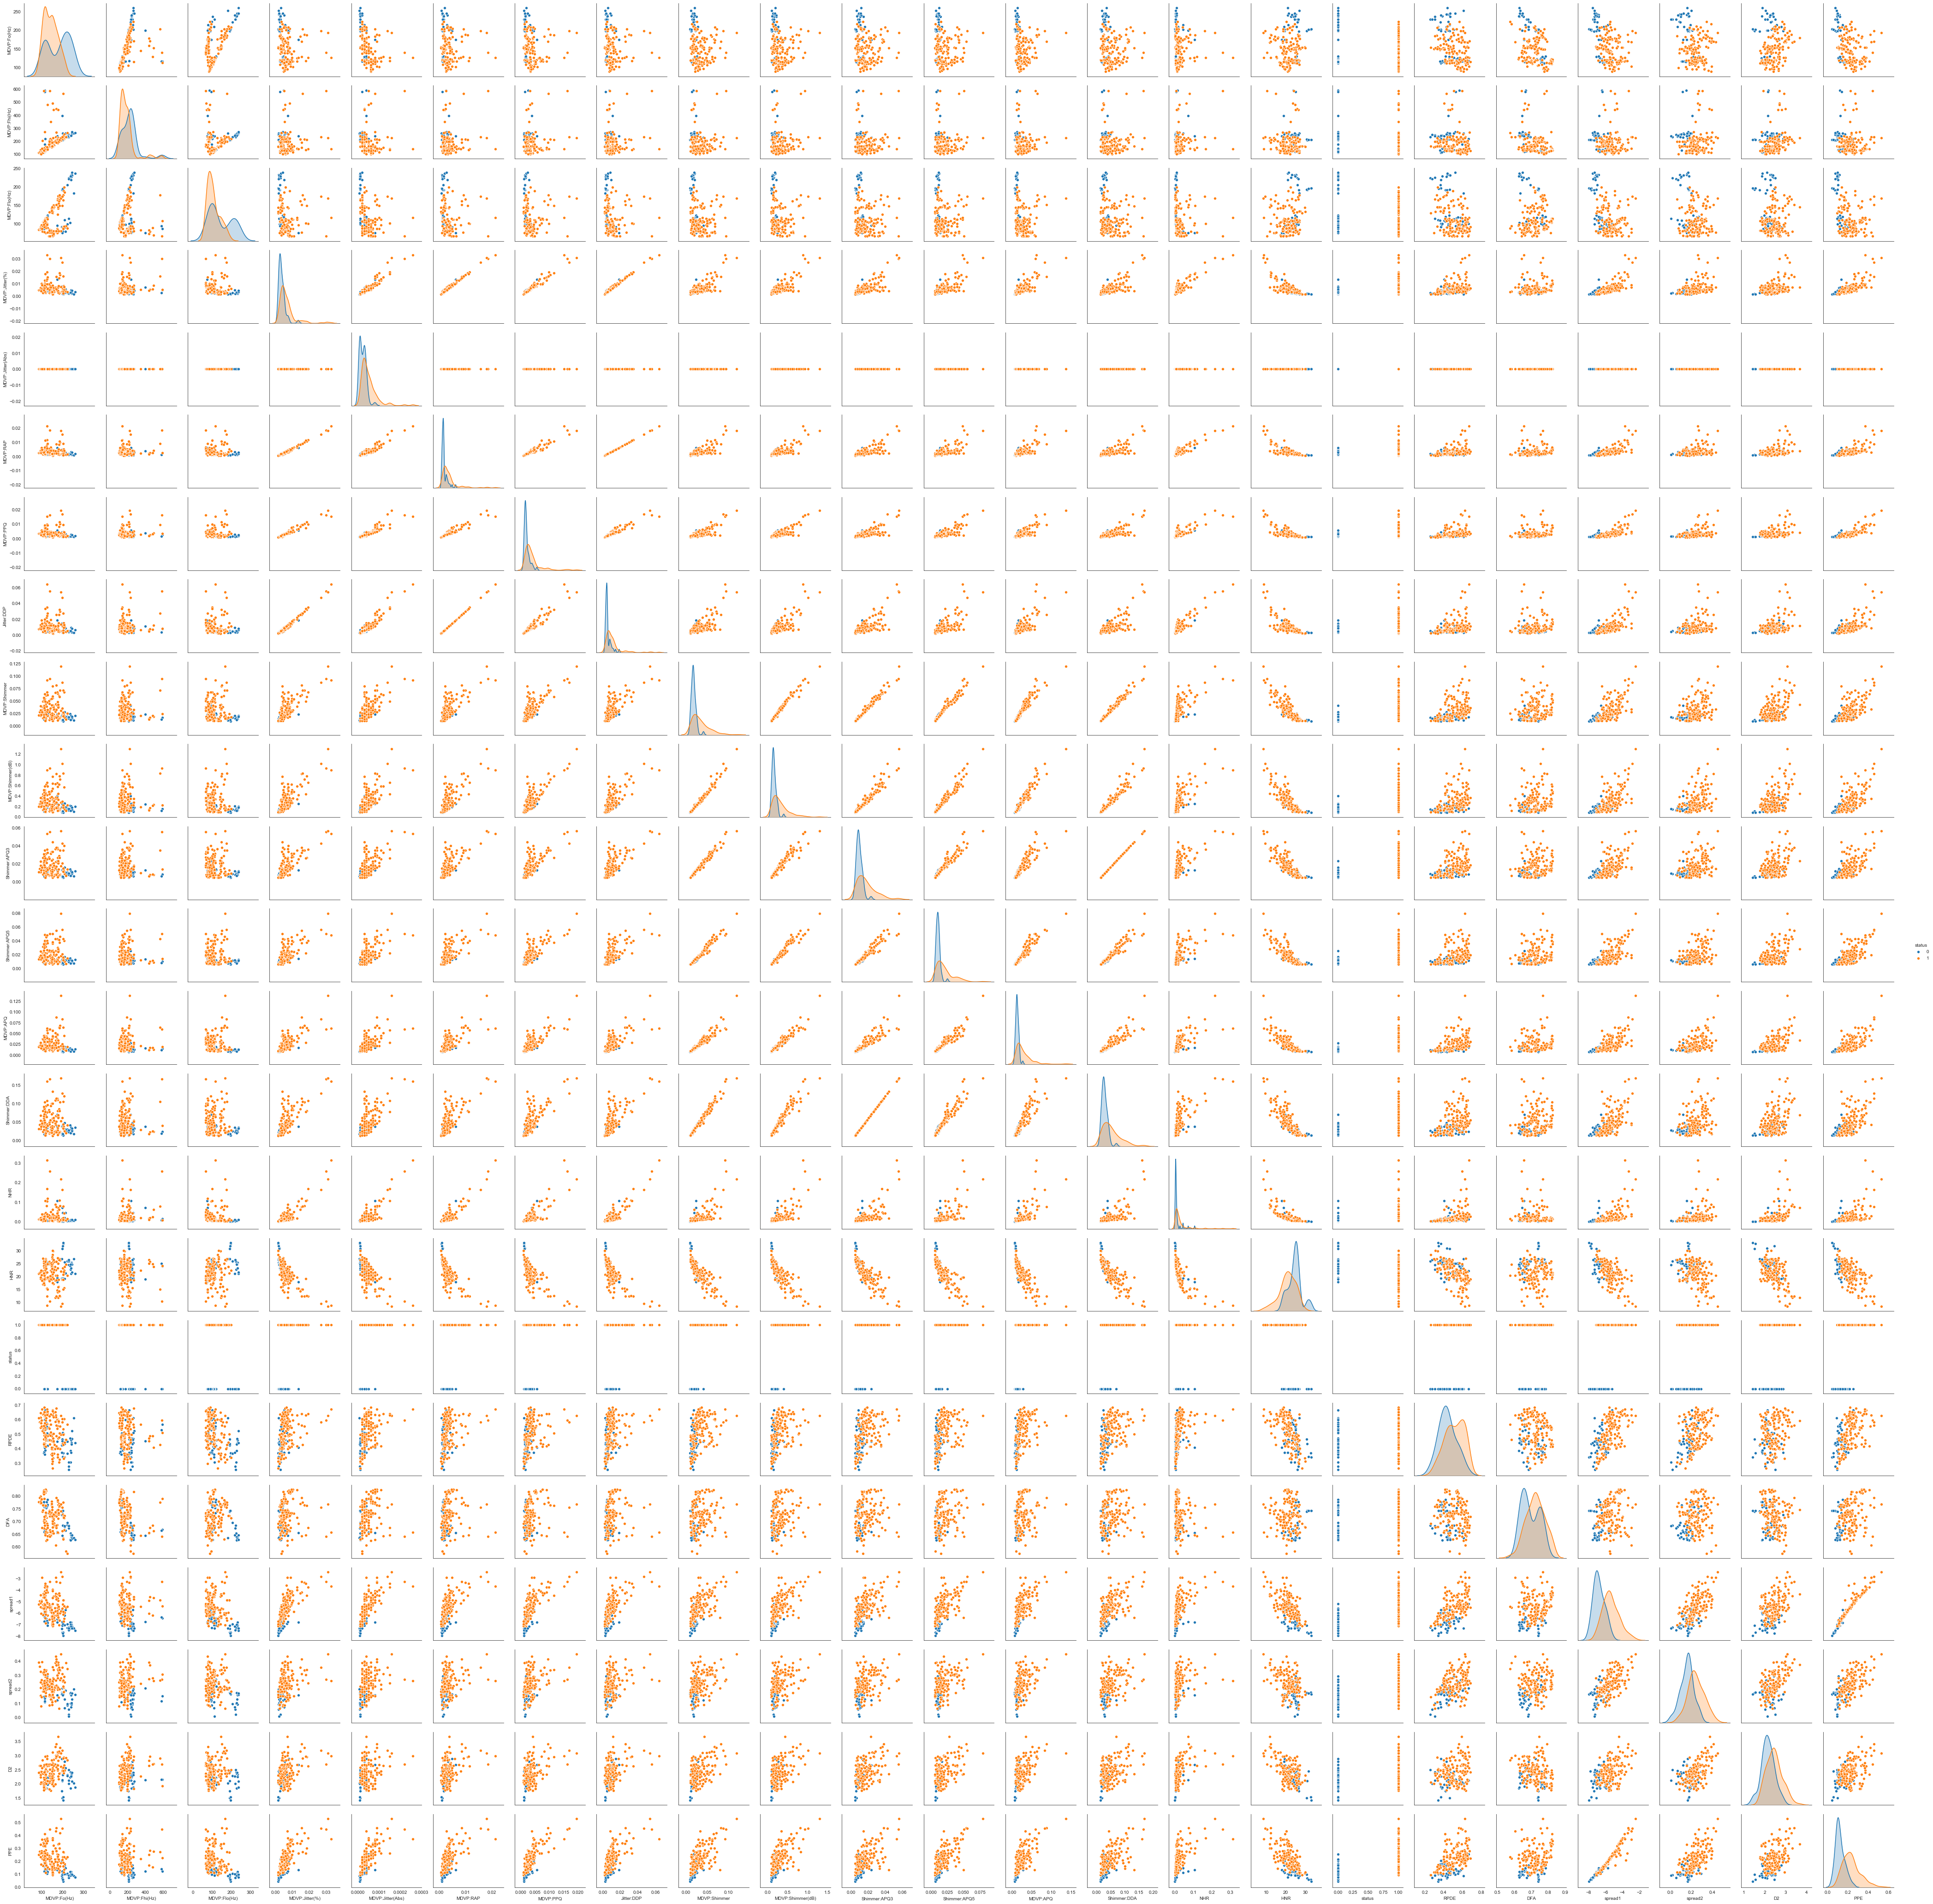

In [643]:
sns.pairplot(df, hue = 'status', diag_kind='kde')    # pairplot
plt.show()

- We notice a heavy correlation between the below mentioned attributes:
    - MDVP:Shimmer
    - MDVP:Shimmer(dB)
    - Shimmer:APQ3
    - Shimmer:APQ5
    - MDVP:APQ
    - Shimmer:DDA
    
    
- Similarly we notice a heavy correlation between the below mentioned attributes:
    - MDVP:Jitter(Abs)
    - MDVP:RAP
    - MDVP:PPQ
    - Jitter:DDP


- Out of all, "spread1" and "spread2" seem to be good predictors of the target

# 4. Split the dataset into training and test set in the ratio of 70:30

- **Seperate Predictors from the target**
- **Split the data into test and train sets**

In [9]:
X = df.drop(columns='status',axis=1)    # Predictors
y = df.loc[:,'status'] # target
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Size of the training dataframe is ",len(X_train))
print("Size of the test dataframe is ",len(X_test))
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

Size of the training dataframe is  136
Size of the test dataframe is  59
69.74% data is in training set
30.26% data is in test set


In [13]:
total_true = len(df.loc[df['status'] == True])
total_false = len(df.loc[df['status'] == False])
print("Total Parkinson's cases: {0} ({1:2.2f}%)".format(total_true, (total_true / (total_true + total_false)) * 100 ))
print("Total healthy cases: {0} ({1:2.2f}%)".format(total_false, (total_false / (total_true + total_false)) * 100))
print("")
print("Training Parkinson's cases    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training healthy cases   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Parkinson's cases   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test healthy cases       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Total Parkinson's cases: 147 (75.38%)
Total healthy cases: 48 (24.62%)

Training Parkinson's cases    : 107 (78.68%)
Training healthy cases   : 29 (21.32%)

Test Parkinson's cases   : 40 (67.80%)
Test healthy cases       : 19 (32.20%)



In [14]:

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
        
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

# 6. Train at least 3 standard classification algorithms

### Iteration 1 - With immediate training and test dataset

In [17]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('Naive Bayes',GaussianNB()))
models.append(("Decision_tree",DecisionTreeClassifier(random_state = 0)))

In [18]:
result1 = pd.DataFrame({'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'Specificity':[],'F1 Score':[]})
for name,model in models:
    accuracy, recall, precision, specificity, f1_score = fit_n_print(model, X_train, X_test, y_train, y_test )
    result1 = result1.append(pd.Series({'Model':name, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision, 'Specificity':specificity, 'F1 Score':f1_score}), ignore_index=True)
print(result1)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  LogisticRegression     0.814    0.95      0.809        0.526     0.874
1                 knn     0.797    0.95      0.792        0.474     0.864
2                 SVC     0.729    1.00      0.714        0.158     0.833
3         Naive Bayes     0.712    0.60      0.960        0.947     0.738
4       Decision_tree     0.898    0.95      0.905        0.789     0.927


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In this scenario **Decision_tree** model tops the chart with all the factors along with accuracy more than other models

### Iteration 2 - On applying Scaling over the dataset

### 5. Scale the data if necessary

In [650]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler
pipelines=[]
pipelines.append(('Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('Naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))
pipelines.append(('DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier(random_state = 0))])))

In [651]:
result2 = pd.DataFrame({'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'Specificity':[],'F1 Score':[]})
for name,model in pipelines:
    accuracy, recall, precision, specificity, f1_score = fit_n_print(model, X_train, X_test, y_train, y_test )
    result2 = result2.append(pd.Series({'Model':name, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision, 'Specificity':specificity, 'F1 Score':f1_score}), ignore_index=True)
print(result2)

                  Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  Logisitic Regression     0.814   0.925      0.822        0.579     0.870
1                   KNN     0.864   1.000      0.833        0.579     0.909
2                   SVC     0.797   1.000      0.769        0.368     0.869
3           Naive bayes     0.678   0.600      0.889        0.842     0.716
4          DecisionTree     0.898   0.950      0.905        0.789     0.927


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Although the ***accuracy has increased for KNN model*** than the previous iteration, but still in this scenario accuracy remains same for ***Decision_tree*** model and tops the chart with all the factors more than other models

### Iteration 3 - Dropping columns which are very less correlated with the target column

In [15]:
X_train3 = X_train.drop(columns =['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)'], axis = 1)
X_test3 = X_test.drop(columns =['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)'], axis = 1)
X_train3.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
42,237.226,225.227,0.00298,0.00001,0.00182,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,22.736,0.305062,-7.310550,0.098648,2.416838,0.095032
17,168.778,75.603,0.00718,0.00004,0.00387,0.03327,0.348,0.01441,0.01893,0.03430,0.04322,20.376,0.631099,-2.931070,0.434326,3.007463,0.430788
5,120.552,113.787,0.00968,0.00008,0.00750,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,21.378,0.415564,-4.242867,0.299111,2.187560,0.357775
120,128.940,88.251,0.00581,0.00005,0.00314,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,24.743,0.487756,-6.186128,0.279933,2.686240,0.152428
98,125.791,96.206,0.01378,0.00011,0.00655,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,15.433,0.571010,-5.159169,0.202146,2.441612,0.260375


In [19]:
result3 = pd.DataFrame({'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'Specificity':[],'F1 Score':[]})
for name,model in models:
    accuracy, recall, precision, specificity, f1_score = fit_n_print(model, X_train3, X_test3, y_train, y_test )
    result3 = result3.append(pd.Series({'Model':name, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision, 'Specificity':specificity, 'F1 Score':f1_score}), ignore_index=True)
print(result3)

                Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  LogisticRegression     0.797    0.95      0.792        0.474     0.864
1                 knn     0.831    0.95      0.826        0.579     0.884
2                 SVC     0.780    1.00      0.755        0.316     0.860
3         Naive Bayes     0.746    0.65      0.963        0.947     0.776
4       Decision_tree     0.915    0.95      0.927        0.842     0.938


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- In this scenario, the accuracy and other factors for ***Decision_tree*** model increases while for other models increases for some and reduces for some.
- Thus once again ***Decision_tree*** model is the best of all with **91.5%** accuracy and **95%** recall score.

### Iteration 4 - OverSampling ovet the minority dataset

In [654]:
over_pipelines=[]
over_pipelines.append(('Logisitic Regression',Pipeline(steps = [('over', RandomOverSampler(sampling_strategy='minority')),('LogisticRegression',LogisticRegression())])))
over_pipelines.append(('KNN',Pipeline([('over', RandomOverSampler(sampling_strategy='minority')),('KNN',KNeighborsClassifier())])))
over_pipelines.append(('SVC',Pipeline([('over', RandomOverSampler(sampling_strategy='minority')),('SVC',SVC())])))
over_pipelines.append(('Naive bayes',Pipeline([('over', RandomOverSampler(sampling_strategy='minority')),('scaled Naive Bayes',GaussianNB())])))
over_pipelines.append(('DecisionTree',Pipeline(steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('decision', DecisionTreeClassifier(random_state = 0))])))

In [655]:
result4 = pd.DataFrame({'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'Specificity':[],'F1 Score':[]})
for name,model in over_pipelines:
    accuracy, recall, precision, specificity, f1_score = fit_n_print(model, X_train, X_test, y_train, y_test )
    result4 = result4.append(pd.Series({'Model':name, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision, 'Specificity':specificity, 'F1 Score':f1_score}), ignore_index=True)
print(result4)

                  Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  Logisitic Regression     0.712    0.75      0.811        0.632     0.779
1                   KNN     0.797    0.85      0.850        0.684     0.850
2                   SVC     0.763    1.00      0.741        0.263     0.851
3           Naive bayes     0.712    0.60      0.960        0.947     0.738
4          DecisionTree     0.831    0.90      0.857        0.684     0.878


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- We see a significant drop in the accuracy-score of DecisionTree, we notice a slight increase in recall-score for the same.
- Also other models as well face a drop in accuracy score
- In-spite of all cases, still DecisionTree has the best accuracy score than others

### Iteration 5 - UnderSampling over the majority dataset

In [656]:
under_pipelines=[]
under_pipelines.append(('Logisitic Regression',Pipeline([('under', RandomUnderSampler(sampling_strategy='majority')),('LogisticRegression',LogisticRegression())])))
under_pipelines.append(('KNN',Pipeline([('under', RandomUnderSampler(sampling_strategy='majority')),('KNN',KNeighborsClassifier())])))
under_pipelines.append(('SVC',Pipeline([('under', RandomUnderSampler(sampling_strategy='majority')),('SVC',SVC())])))
under_pipelines.append(('Naive bayes',Pipeline([('under', RandomUnderSampler(sampling_strategy='majority')),('scaled Naive Bayes',GaussianNB())])))
under_pipelines.append(('DecisionTree',Pipeline(steps = [('under', RandomUnderSampler(sampling_strategy='majority')), ('decision', DecisionTreeClassifier())])))

In [657]:
result5 = pd.DataFrame({'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'Specificity':[],'F1 Score':[]})
for name,model in under_pipelines:
    accuracy, recall, precision, specificity, f1_score = fit_n_print(model, X_train, X_test, y_train, y_test )
    result5 = result5.append(pd.Series({'Model':name, 'Accuracy':accuracy, 'Recall':recall, 'Precision':precision, 'Specificity':specificity, 'F1 Score':f1_score}), ignore_index=True)
print(result5)

                  Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  Logisitic Regression     0.746   0.775      0.838        0.684     0.805
1                   KNN     0.797   0.825      0.868        0.737     0.846
2                   SVC     0.780   0.950      0.776        0.421     0.854
3           Naive bayes     0.695   0.600      0.923        0.895     0.727
4          DecisionTree     0.864   0.850      0.944        0.895     0.895


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- While all the models encounter fall in the accuracy value, **Logisitic Regression** increase a bit.
- Accuracy of KNN remains unaffected, but recall value falls
- In this scenario KNN is more effective than others

- Thus the best sample achieved is from **Iteration 3 with 91.5% accuracy of Decision Tree**,
- Followed by **Iteration 2 with 89.8% accuracy of Decision Tree and 86.4% for KNN**

# 7. Train a meta-classifier and note the accuracy on test data

In [658]:
def Stacking(model,n_fold,train,test,y):
    folds= StratifiedKFold(n_splits=n_fold,random_state=1)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        X_train_s,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train_s,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=X_train_s,y=y_train_s)
        train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=model.predict(test)
    return test_pred.reshape(-1,1),train_pred

In [659]:
model1 = DecisionTreeClassifier(max_depth = 5,random_state=1)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train3,test=X_test3,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [660]:
model2 = Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier())])

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [661]:
df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression()
model.fit(df_train,y_train)
model.score(df_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7966101694915254

In [662]:
df_train = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = DecisionTreeClassifier(max_depth = 3,random_state=1)
model.fit(df_train,y_train)
model.score(df_test, y_test)

0.7966101694915254

Applied **stacking technique** as below:
- Applied *Iteration3 model of Decision tree* with accuracy as 91.5%
- Applied *Iteration2 Scaled model of KNN* with accuracy as 86.4%
- Finally stacked the predication of both the above models and applied to LogisticRegression
- Final Accuracy = 79.66%

# Decision Tree Pruning

In [20]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 0,
                               max_depth=3)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Tuning DecisionTree Using Pruning

In [21]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [22]:
print("Test Accuracy = ", accuracy_score(y_test,preds_pruned) * 100,"%")
print("Train Accuracy = ",accuracy_score(y_train,preds_pruned_train) * 100,"%")

Test Accuracy =  91.52542372881356 %
Train Accuracy =  97.79411764705883 %


In [23]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [25]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feature_cols = X_train.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
PPE,0.434335
MDVP:Fo(Hz),0.245788
Shimmer:DDA,0.118884
MDVP:Fhi(Hz),0.111931
DFA,0.089061
MDVP:Flo(Hz),0.000000
D2,0.000000
spread2,0.000000
spread1,0.000000
RPDE,0.000000


Thus the top five attributes are considered to be important to construct the Decision tree

### Checking the accuracy for depth from 1 to 6

In [668]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)   
    print(depth,score)

1 0.8135593220338984
2 0.7627118644067796
3 0.8135593220338984
4 0.8305084745762712
5 0.8983050847457628


Although max_depth = 5 gives the best accuracy as 89.83%, but post pruning, max_depth = 3 gives the accuracy as 91.5%

In [26]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.915254


# 8. Train at least one standard Ensemble model

### a) Random forest model

In [670]:
n_estimators_range = list(range(1, 20))

for n_est in n_estimators_range:
    rfcl = RandomForestClassifier(n_estimators = n_est,random_state=1)
    rfcl = rfcl.fit(X_train, y_train)
    pred_RF = rfcl.predict(X_test)
    acc_RF = accuracy_score(y_test, pred_RF)
    print(n_est,acc_RF)

1 0.7796610169491526
2 0.7288135593220338
3 0.7457627118644068
4 0.8305084745762712
5 0.8135593220338984
6 0.8305084745762712
7 0.8305084745762712
8 0.8813559322033898
9 0.847457627118644
10 0.8983050847457628
11 0.9152542372881356
12 0.9152542372881356
13 0.8983050847457628
14 0.9322033898305084
15 0.8813559322033898
16 0.8813559322033898
17 0.864406779661017
18 0.864406779661017
19 0.864406779661017


Best estimator = 14 within a range of 1 to 20

In [27]:
rfcl_1 = RandomForestClassifier(n_estimators = 14,random_state=1)
rfcl_1 = rfcl_1.fit(X_train, y_train)
pred_RF = rfcl_1.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [28]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.915254
0,Random Forest,0.932203


### b) Adaboost Ensemble Algorithm

In [673]:
n_estimators_ada = list(range(1, 100))

for n_est in n_estimators_ada:
    rfcl = AdaBoostClassifier( n_estimators= n_est, learning_rate=0.1, random_state=22)
    rfcl = rfcl.fit(X_train, y_train)
    pred_RF = rfcl.predict(X_test)
    acc_RF = accuracy_score(y_test, pred_RF)
    print(n_est,acc_RF)

1 0.8135593220338984
2 0.8135593220338984
3 0.8135593220338984
4 0.7966101694915254
5 0.7966101694915254
6 0.7966101694915254
7 0.7966101694915254
8 0.7966101694915254
9 0.7966101694915254
10 0.7966101694915254
11 0.8135593220338984
12 0.8305084745762712
13 0.8135593220338984
14 0.8135593220338984
15 0.8135593220338984
16 0.8135593220338984
17 0.7796610169491526
18 0.7966101694915254
19 0.8135593220338984
20 0.8135593220338984
21 0.7966101694915254
22 0.7966101694915254
23 0.8305084745762712
24 0.7966101694915254
25 0.8135593220338984
26 0.8135593220338984
27 0.8305084745762712
28 0.8135593220338984
29 0.8305084745762712
30 0.8135593220338984
31 0.8135593220338984
32 0.8135593220338984
33 0.8135593220338984
34 0.8135593220338984
35 0.8305084745762712
36 0.847457627118644
37 0.847457627118644
38 0.847457627118644
39 0.847457627118644
40 0.847457627118644
41 0.847457627118644
42 0.847457627118644
43 0.847457627118644
44 0.847457627118644
45 0.864406779661017
46 0.847457627118644
47 0.864

In [29]:
abcl = AdaBoostClassifier( n_estimators= 66, learning_rate=0.1, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [30]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [31]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.915254
0,Random Forest,0.932203
0,Adaboost,0.915254


### Bagging Classifier Algorithm

In [677]:
n_estimators_bag = list(range(1, 20))

for n_est in n_estimators_bag:
    rfcl = BaggingClassifier(n_estimators=n_est, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
    rfcl = rfcl.fit(X_train, y_train)
    pred_RF = rfcl.predict(X_test)
    acc_RF = accuracy_score(y_test, pred_RF)
    print(n_est,acc_RF)

D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable

1 0.7796610169491526
2 0.7627118644067796
3 0.847457627118644
4 0.8813559322033898
5 0.864406779661017
6 0.8983050847457628
7 0.8983050847457628
8 0.8983050847457628
9 0.8983050847457628
10 0.9152542372881356
11 0.8983050847457628
12 0.8983050847457628
13 0.8983050847457628
14 0.8983050847457628
15 0.8983050847457628
16 0.8983050847457628
17 0.8983050847457628
18 0.8983050847457628
19 0.8813559322033898


In [32]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [33]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.915254
0,Random Forest,0.932203
0,Adaboost,0.915254
0,Bagging,0.915254


### GradientBoost Classifier Algorithm

In [681]:
n_estimators_grad = list(range(1, 50))

for n_est in n_estimators_grad:
    rfcl = GradientBoostingClassifier(n_estimators = n_est, learning_rate = 0.2, random_state=22)
    rfcl = rfcl.fit(X_train, y_train)
    pred_RF = rfcl.predict(X_test)
    acc_RF = accuracy_score(y_test, pred_RF)
    print(n_est,acc_RF)

1 0.6779661016949152
2 0.7966101694915254
3 0.7966101694915254
4 0.847457627118644
5 0.9152542372881356
6 0.847457627118644
7 0.847457627118644
8 0.9152542372881356
9 0.9152542372881356
10 0.8813559322033898
11 0.9152542372881356
12 0.9152542372881356
13 0.9152542372881356
14 0.8813559322033898
15 0.8813559322033898
16 0.8813559322033898
17 0.8813559322033898
18 0.8813559322033898
19 0.8813559322033898
20 0.8813559322033898
21 0.8813559322033898
22 0.8813559322033898
23 0.8813559322033898
24 0.8813559322033898
25 0.864406779661017
26 0.864406779661017
27 0.864406779661017
28 0.864406779661017
29 0.864406779661017
30 0.864406779661017
31 0.864406779661017
32 0.864406779661017
33 0.864406779661017
34 0.864406779661017
35 0.864406779661017
36 0.864406779661017
37 0.864406779661017
38 0.864406779661017
39 0.864406779661017
40 0.864406779661017
41 0.864406779661017
42 0.864406779661017
43 0.864406779661017
44 0.864406779661017
45 0.864406779661017
46 0.864406779661017
47 0.864406779661017
4

In [35]:
gbcl = GradientBoostingClassifier(n_estimators = 5, learning_rate = 0.2, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [36]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [37]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.915254
0,Random Forest,0.932203
0,Adaboost,0.915254
0,Bagging,0.915254
0,Gradient Boost,0.915254


# 9. Compare all the models and pick the best one among them

For this dataset, Random forest give the best results on test predictions. 
And after tuning the hyperparameters we get that almost all other models give a maximum of 91.5% accuracy

In [38]:
print(result3)
print("----------------------------------------------------------------------------")
print(resultsDf)

                Model  Accuracy  Recall  Precision  Specificity  F1 Score
0  LogisticRegression     0.797    0.95      0.792        0.474     0.864
1                 knn     0.831    0.95      0.826        0.579     0.884
2                 SVC     0.780    1.00      0.755        0.316     0.860
3         Naive Bayes     0.746    0.65      0.963        0.947     0.776
4       Decision_tree     0.915    0.95      0.927        0.842     0.938
----------------------------------------------------------------------------
           Method  accuracy
0   Decision Tree  0.915254
0   Random Forest  0.932203
0        Adaboost  0.915254
0         Bagging  0.915254
0  Gradient Boost  0.915254


Taking everything into consideration, Random Forest gives the best accuracy as 93.2% with n_estimators = 14